# Exploratory analysis of provided data set

* Inference of the target attribute (patient Alzheimer state)
* Distribution of the values towards attributes
* Relative correlational analysis of attributes
* Basic bayesian model training and evaluation (TODO)

## Resources

### Attributes description:

<https://www.alz.washington.edu/NONMEMBER/NP/rdd_np.pdf>

<https://www.alz.washington.edu/WEB/rdd_uds.pdf>


In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/data.csv")

/usr/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,23,25,27,31,139,141,163,172,213,283,299,319,354) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,NACCADC,NACCID,FORMVER,PACKET,NACCVNUM,VISITNUM,VISITMO,VISITDAY,VISITYR,NACCAVST,...,NPPDXQ,NACCOTHP,NACCWRI1,NACCWRI2,NACCWRI3,NPPADP,NPCADP,NPPAD,NPCAD,NACCACTV
0,289,NACC000385,1,I,1,1,11,8,2006,7,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,289,NACC000385,2,F,2,2,3,19,2008,7,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,289,NACC000385,2,F,3,3,3,4,2009,7,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,289,NACC000385,2,F,4,4,4,21,2010,7,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,289,NACC000385,2,F,5,5,1,28,2011,7,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
len(df)

12629

In [5]:
# TODO: data cleanup:

# interpolate categorical data with invalid categories here - choose only positively, nonzero-correlating attributes
# filter the data to the ones with filled target attribute (ABC score)

In [6]:
# remove 'ALCABUSE', 'NPCADP' - no data
df = df.drop(labels="NPCADP", axis=1)
df = df.drop(labels="ALCABUSE", axis=1)

# data with filled ABC score only
abc_df = df[df["NPADNC"] != -4]
abc_df = abc_df[abc_df["NPADNC"] < 4]

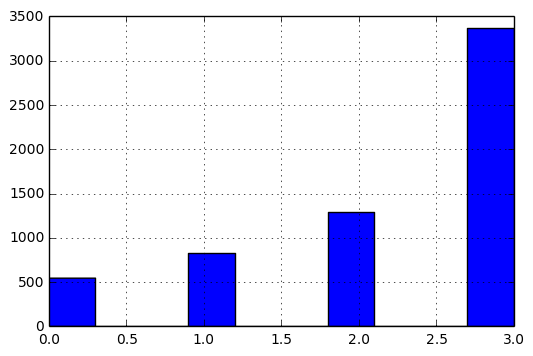

In [7]:
# -4 = no data
# distribution of the states of the disease in data having the attribute available
# 0 -  Not AD, 3 - High ADNC, others - no valid data
abc_df["NPADNC"].hist(xlabelsize=10)

In [8]:
abc_df["NPADNC"].describe()

count    6037.000000
mean        2.240682
std         0.999610
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: NPADNC, dtype: float64

In [9]:
# analysis of other non attributes possibly usable for classification
# more data is filled with this target attribute
df[df["NACCDIFF"]< 8]["NACCDIFF"].apply(str).describe()

count     11444
unique        4
top           3
freq       6937
Name: NACCDIFF, dtype: object

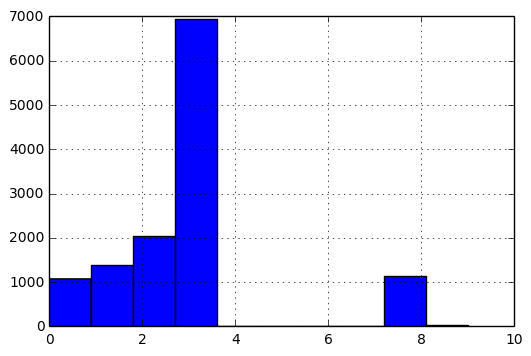

In [10]:
# analysis of other non attributes possibly usable for classification
# Density of diffuse plaques (CERAD semi-quantitative score)
# aproximates the distribution of ABC score (NPADNC) pretty well
df["NACCDIFF"].hist()

In [11]:
# lets see how well the NPADNC and NACCDIFF match:
# expressed by Jaccard sets matching coefficient
matching = abc_df[abc_df["NPADNC"] == abc_df["NACCDIFF"]]
non_matching = abc_df[abc_df["NPADNC"] != abc_df["NACCDIFF"]]
# jaccard
float(len(matching))/(len(matching)+len(non_matching))

0.66340897796919

In [12]:
# correlation on dataset with filled ABC score
abc_df.corr()["NACCDIFF"]["NPADNC"]

0.42633527110942004

In [13]:
# ^^ both low => we can not substitute ABC Score (NPADNC) with NACCDIFF :(

In [14]:
# analysis of other non attributes possibly usable for classification
df[df["NACCNEUR"]< 8]["NACCNEUR"].apply(str).describe()

count     12606
unique        4
top           3
freq       6274
Name: NACCNEUR, dtype: object

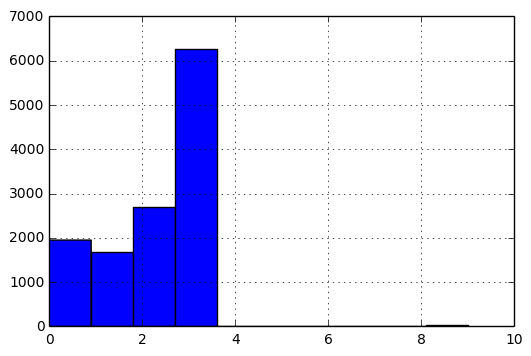

In [15]:
# distribution of the NACCNEUR var does not precisely fit the best classification var: ABC score.
df["NACCNEUR"].hist()

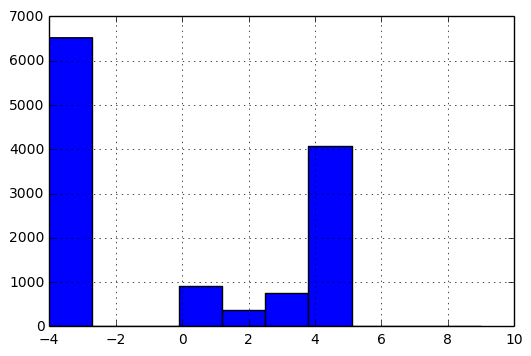

In [16]:
# A and B-scores do not fit it at all then
# A score
# lots of data missing (= -4)
df["NPTHAL"].hist()

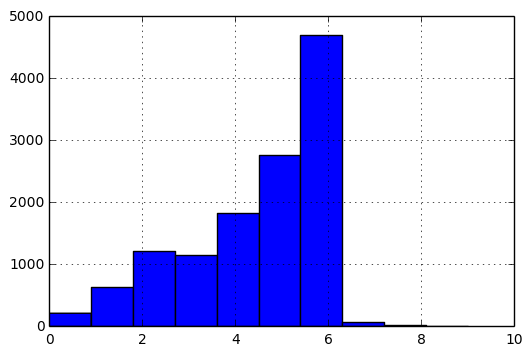

In [17]:
# B score
df["NACCBRAA"].hist()

/usr/lib64/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


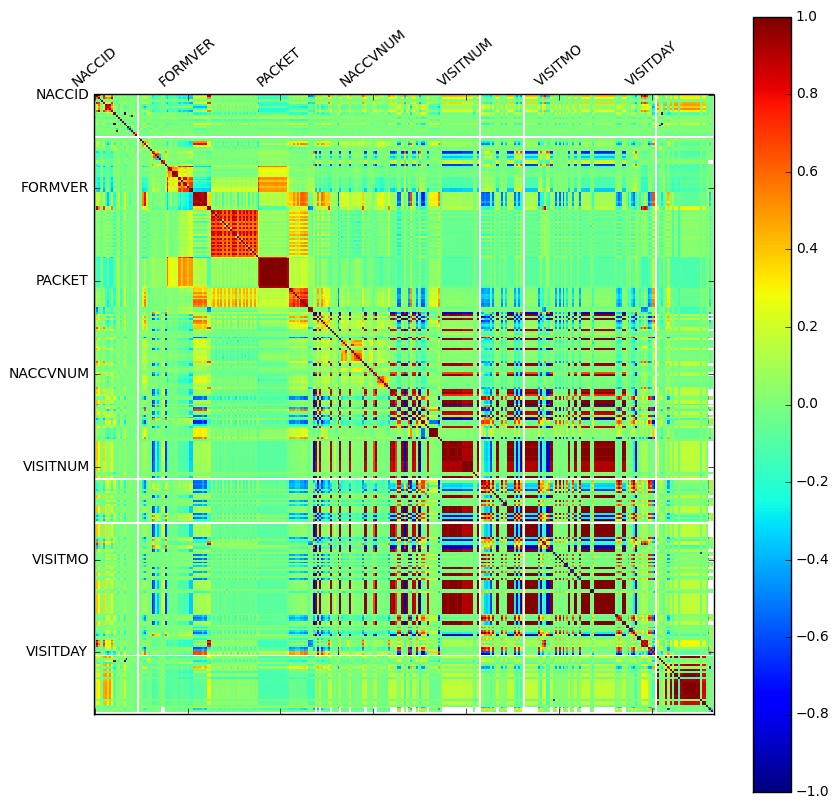

In [18]:
# relative correlation matrix

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

cax = ax.matshow(df.corr())
fig.colorbar(cax)

ax.set_xticklabels(df.keys().values, rotation=40)
ax.set_yticklabels(df.keys().values)

# plt.xticks(range(len(df.keys())), df.keys())
# plt.yticks(range(len(df.keys())), df.keys())

plt.show()

In [19]:
# correlation with target attribute
correlations = abc_df.corr()
most_correlated = correlations["NPADNC"].sort_values(ascending=False).iloc[:30]

most_correlated

NPADNC      1.000000
NPTHAL      0.895679
NACCNEUR    0.864710
NACCBRAA    0.849170
NACCUDSD    0.477887
NACCMCII    0.466761
DEMENTED    0.456404
NACCIDEM    0.449954
MEMORY      0.436752
NACCDIFF    0.426335
COGMEM      0.416403
ORIENT      0.415642
CDRSUM      0.398870
CDRGLOB     0.391845
HOMEHOBB    0.387993
COMMUN      0.382511
JUDGMENT    0.382081
REMDATES    0.376781
EVENTS      0.353876
COGJUDG     0.353807
PAYATTN     0.342122
INDEPEND    0.340915
TRAVEL      0.339822
BILLS       0.326002
TAXES       0.313193
SHOPPING    0.307805
PERSCARE    0.291354
COGFLUC     0.284206
STOVE       0.277187
COGLANG     0.268161
Name: NPADNC, dtype: float64

In [29]:
# inverse correlations with target variable
most_inv_correlated = correlations["NPADNC"].sort_values(ascending=True).iloc[:30]

most_inv_correlated

NACCLBDS   -0.457943
NACCBVFT   -0.456916
NACCALZP   -0.443916
FRSTCHG    -0.442503
DECAGE     -0.441181
NACCNORM   -0.439311
NACCPPA    -0.438762
NACCLBDE   -0.437727
COURSE     -0.435966
DOWNSIF    -0.435625
NORMCOG    -0.435625
HUNTIF     -0.431595
PRIONIF    -0.427682
NACCALZD   -0.423686
ALCDEM     -0.421277
NACCETPR   -0.417331
POSSAD     -0.408578
NEOPIF     -0.407807
PROBADIF   -0.404531
VASC       -0.400147
DEMUN      -0.399640
FTD        -0.398303
PPAPH      -0.397506
PSPIF      -0.393220
PROBAD     -0.361170
ALCDEMIF   -0.349468
OTHPSYIF   -0.320463
VASCPS     -0.299637
HYCEPHIF   -0.295846
CORTIF     -0.289121
Name: NPADNC, dtype: float64

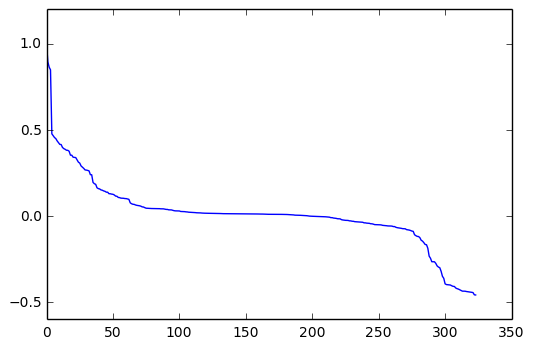

In [20]:
# sorted correlations with target attribute 
plt.plot(abc_df.corr()["NPADNC"].sort_values(ascending=False))
plt.show()

In [21]:
df.keys().values[range(0, len(df.keys().values), 20)]

array(['NACCADC', 'SEX', 'SMOKYRS', 'MEMORY', 'ANX', 'BORED', 'PAYATTN',
       'COGMODE', 'NACCBEHF', 'LBDEVAL', 'NACCMCII', 'NACCADMU', 'FTLDNOS',
       'STROKIF', 'HIVIF', 'ALCDEM', 'NACCNORM', 'NPPDXH'], dtype=object)

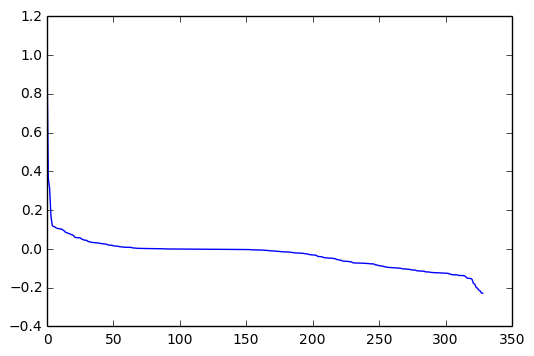

In [22]:
# correlations with NACCDIFF are in average significantly smaller
plt.plot(df.corr()["NACCDIFF"].sort_values(ascending=False))

In [23]:
# correlated attributes surprisingly do not much match the correlations above
# This is NOT A SELECTED TARGET VARIABLE, do not look here
most_correlated = df.corr()["NACCDIFF"].sort_values(ascending=False).iloc[:30]

# most_correlated

In [24]:
# analysis of p-values of attributes by testing the null hyphotesis on mean and diffusion

# considering only promising params from correlations (ones with any positive correlation)
any_correlated = correlations[correlations["NPADNC"] > 0]["NPADNC"]
selected_chi = abc_df[any_correlated.index.values]

# remove attributes with too many NaNs - more than 50%
attributes_nans = selected_chi.apply(lambda col: sum(np.isnan(col)))
attributes_filled = attributes_nans[attributes_nans < len(attributes_nans)/2].index.values
selected_chi = selected_chi[attributes_filled]

# replace values of (Not assessed, Missing/unknown, not collected) with interpolated values
attributes_uniques = selected_chi.applymap(str).describe().transpose()["unique"]
weird_attributes = ['SMOKYRS', 'PACKSPER', 'NACCBMI', 'NACCGDS', 'BEREMAGO', 'PARKAGE', "BEVHAGO"]
replaced_attributes = attributes_uniques[attributes_uniques < 8].index.values.tolist() + weird_attributes
selected_chi[replaced_attributes] = selected_chi[replaced_attributes].replace([-4, 8, 9], np.nan)

# apply the interpolation on the attributes with surrounding data
interpolated_selected = selected_chi.apply(lambda col: col.interpolate())

# set non-interpolated values to zero
# required for classification and t/chi importance test to have all values filled
interpolated_selected.index = np.arange(len(interpolated_selected.index))
non_interpolated_coords = np.argwhere(~np.isfinite(interpolated_selected.values))
interpolated_selected.ix[np.transpose(non_interpolated_coords)[0], np.transpose(non_interpolated_coords)[1]] = 0

selected_chi = interpolated_selected

In [25]:
# infinity test
np.all(np.isfinite(interpolated_selected.values))

True

In [26]:
# positivity test
np.all(interpolated_selected >= 0)

True

In [27]:
interpolated_selected.keys().values[np.unique(np.argwhere(interpolated_selected.values < 0)[:,1])]

array([], dtype=object)

In [31]:
from sklearn.feature_selection import chi2

p_values = chi2(selected_chi[any_correlated.index.values], selected_chi["NPADNC"])[1]
p_values_s = pd.Series(p_values, index=any_correlated.index.values)
p_values_sorted = p_values_s.sort_values(ascending=True)
p_values_sorted.iloc[:50].transpose()
# most significant relations to the target attribute have the smallest p-value

NACCGDS      0.000000e+00
PARKAGE      0.000000e+00
ALSAGE       0.000000e+00
CDRSUM       0.000000e+00
NACCBMI      0.000000e+00
SMOKYRS      0.000000e+00
NACCINT      0.000000e+00
BEVHAGO      0.000000e+00
NACCBRAA     0.000000e+00
BEREMAGO     0.000000e+00
NACCNEUR     0.000000e+00
NPADNC       0.000000e+00
NACCDIFF     0.000000e+00
NPTHAL       0.000000e+00
ORIENT      2.870556e-292
EVENTS      1.469618e-291
BILLS       1.426324e-287
GAMES       2.720700e-278
TAXES       3.508700e-273
REMDATES    1.597173e-263
MEMORY      7.419388e-263
PAYATTN     1.616332e-262
HOMEHOBB    1.881948e-262
SHOPPING    1.008671e-256
TRAVEL      1.486461e-250
JUDGMENT    5.490658e-245
COMMUN      4.000676e-242
MEALPREP    2.000162e-239
CDRGLOB     1.508876e-229
STOVE       2.708732e-224
PERSCARE    1.907186e-202
NACCMOTF    1.081068e-187
NACCUDSD    7.508848e-176
MOMODE      3.910335e-163
NACCBEHF    5.877272e-137
DEMENTED    7.202064e-127
NACCCOGF    7.675112e-124
INDEPEND    1.028085e-112
COGJUDG     

## Machine learning estimators

We have decided to experiment and evaluate a few selected methods of the various sort:

* LDA

* Logistic Regression

* Bayesian Classifier

* Decision trees (Random Decision Forrest)


In [42]:
from sklearn.model_selection import StratifiedKFold

# removing the attributes of A, B, C scores from prediction set, those enable us to achieve 100% accuracy:
abc_attributes = set(["NPTHAL", "NACCNEUR", "NACCBRAA"])

X = selected_chi[list(set(any_correlated.index.values) - abc_attributes)]
y = selected_chi["NPADNC"]

results = dict()

In [43]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as Classifier
method = "LDA"

In [45]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression as Classifier
method = "Logistic Regression"

In [47]:
# Bayesian Classifier
from sklearn.naive_bayes import MultinomialNB as Classifier
method = "Naive Bayes"

In [49]:
# Tree Ensemble Classifier
from sklearn.ensemble import RandomForestClassifier as Classifier
method = "Random Forrest"

In [54]:
from sklearn.naive_bayes import GaussianNB
method = "Gaussian NB"

In [63]:
from sklearn.linear_model import SGDClassifier
method = "SGDClassifier"

In [68]:
from sklearn.mixture import BayesianGaussianMixture
method = "BayesianGaussianMixture"

In [69]:
results[method] = []
for train_coords, test_coords in StratifiedKFold(n_splits=10, shuffle=False).split(X ,y):
    classifier = Classifier()
    classifier.fit(X.iloc[train_coords], y.iloc[train_coords])
    accuracy = classifier.score(X.iloc[test_coords], y.iloc[test_coords])
    print accuracy
    results[method].append(accuracy)

0.874587458746
0.884297520661
0.956953642384
0.908940397351
0.902317880795
0.933665008292
0.948590381426
0.912106135987
0.837479270315
0.895348837209


In [51]:
# Baseline
results["Baseline (Random)"] = [0.25 for _ in range(10)]

In [70]:
results_df = pd.DataFrame(results)

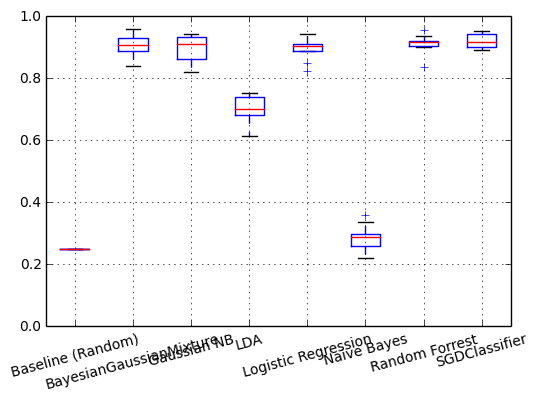

In [71]:
axes = plt.gca()
axes.set_ylim([0,1])
results_df.boxplot(figsize=(12, 3), rot=15)